# Applied Machine Learning (2021), exercises


## General instructions for all exercises

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Do not change other areas of the document, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manualle graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks may be text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, download the whole notebook, using menu `File -> Download as -> Notebook (.ipynb)`. Save the file in your hard disk, and submit it in [Moodle](https://moodle.uwasa.fi) under the corresponding excercise.

Your solution should be an executable Python code. Use the code already existing as an example of Python programing and read more from the numerous Python programming material from the Internet if necessary. 


In [1]:
NAME = "Markku Pulli"
Student_number = "121763"

---

# Unsupervised learning, projections

## Task 1: Apply k-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

The data-file `liver-spectroscopy.tab` is a text file which contains a Near Infrared Spectral (NIR) measurements of different cells from a liver. The file includes 731 samples, and each one has 234 variables. The variables describes the amount of infrared radiation absorbed in each of the tested 234 wavelengths. The last column in the data is the cell type, which can be one of the four types: 'collagen', 'glycogen', 'lipids' or 'DNA'. The column names are the wavelengths used in measuring the absorbtion values for the specific columns.

In [7]:
D = pd.read_table('/content/liver-spectroscopy.tab')

# Print the classes
print(D.type.unique())

# Separate the true classes out from the data, into separate variable
types=pd.Categorical(D.type)
#del(D['type'])

['collagen' 'glycogen' 'lipids' 'DNA']


First task is to apply PCA to transform the data `D` to PCA projection `projected`. Then apply KMeans to `projected` and try to find clusters from the data. Use just enough PCA-components to contain more than 90% of the variance. Name your KMeans object as `kmeans`.

Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis.

          1801.264  1797.407  1793.55  ...  910.2748  906.4177  902.5606
type                                   ...                              
DNA            110       110      110  ...       110       110       110
collagen       195       195      195  ...       195       195       195
glycogen       212       212      212  ...       212       212       212
lipids         214       214      214  ...       214       214       214

[4 rows x 234 columns]
Variance Ratio using 3 components is  [0.64024105 0.20265106 0.06353028]
Variance Ratio cumulative sum using 3 components is  0.9064223943962983


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


234 731
[[-0.17609749  0.51549108 -0.03066504]
 [ 0.34888771 -0.06262261  0.19553594]
 [-0.7667525  -0.32514303 -0.07770173]
 [ 1.01380942 -0.21409979 -0.15133371]]


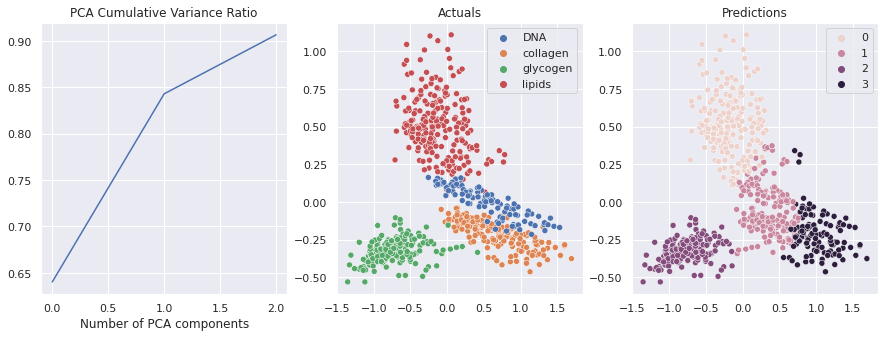

In [8]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

print(D.groupby(D['type']).count())
del(D['type'])
#Let's check required PCA component count
i=3
pca = PCA(n_components=i)
projected = pca.fit_transform(D)
print("Variance Ratio using %d components is " %i, pca.explained_variance_ratio_)
print("Variance Ratio cumulative sum using %d components is " %i, pca.explained_variance_ratio_.sum())
f, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_), ax=axs[0])
axs[0].set_title('PCA Cumulative Variance Ratio')
axs[0].set_xlabel('Number of PCA components')
#plt.ylabel('cumulative explained variance');
kmeans = KMeans(n_clusters=4).fit(projected)
kmeans_preds = kmeans.predict(projected)
axs[1].set_title('Actuals')
axs[2].set_title('Predictions')
sns.scatterplot(projected[:,0], projected[:,1], hue=types, ax=axs[1])
sns.scatterplot(projected[:,0], projected[:,1], hue=kmeans_preds, ax=axs[2])
labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(types.rename_categories([3,2,1,0]) == labels)
print(correct_labels, types.size)
print(kmeans.cluster_centers_)

In [9]:
assert(kmeans.cluster_centers_.shape==(4,3))
assert(projected.shape==(731,3))
assert(abs(kmeans.inertia_-75)<5)

## Task 2, apply PCA and GMM

Use previous PCA projection and apply Gaussian Mixture Model to projected data and try to find clusters from the data. Use `gmm` as a name for GaussianMixture object.

Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

-270.0034311519495

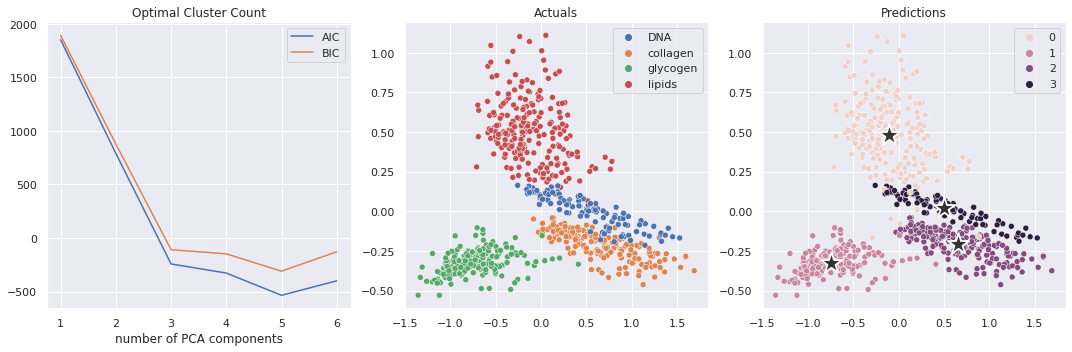

In [34]:
# YOUR CODE HERE
from sklearn.mixture import GaussianMixture
#let's check how many clusters GaussianMixture model prefers/finds
n_components = np.arange(1,7)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(projected) for n in n_components]
f, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title('Optimal Cluster Count')
axs[0].set_xlabel('number of PCA components')
sns.lineplot(n_components, [m.aic(projected) for m in models], x='n_components', label='AIC', ax=axs[0]) #lower value the better
sns.lineplot(n_components, [m.bic(projected) for m in models], label='BIC', ax=axs[0]) #lower value the better
#According to Gaussian mixture model optimal cluster count is 5, what is wrong with this data set.
gmm = GaussianMixture(n_components=4).fit(projected)
gmm_preds = gmm.predict(projected)
axs[1].set_title('Actuals')
axs[2].set_title('Predictions')
sns.scatterplot(projected[:,0], projected[:,1], hue=types, ax=axs[1])
sns.scatterplot(projected[:,0], projected[:,1], hue=gmm_preds, ax=axs[2])
sns.scatterplot(gmm.means_[:,0], gmm.means_[:,1], color=".2", s=500, marker="*", ax=axs[2])
f.tight_layout()
gmm.bic(projected)

In [11]:
assert(projected.shape==(731,3))
assert(abs(gmm.bic(projected)+269)<10)

## Task 3: Confusion matrix

Calculate the confusion matrix `CM` between the clusters and true tissue types. Find from `CM`, the number of the cluster where *DNA* tissue type samples are most often assigned. Assign in variable `nDNA` the number of times the samples of tissue type *DNA* were assigned into this cluster.

Some instructions

1. Find the category number of DNA ny listing `types.categories`. The category number is the index of string 'DNA' in the list of categories.
1. Use `CM=confusion_matrix)=` -function from `sklearn.metrics` to plot the confusion matrix
1. Assign the found number in variable `nDNA`


In [12]:
types.categories

Index(['DNA', 'collagen', 'glycogen', 'lipids'], dtype='object')

In [13]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
#Category number of 'DNA' is '0'
cat_t = types.categories
print(cat_t[0])
#try this
#k_labels = gmm_preds  # Get cluster labels
k_labels = gmm_preds
k_labels_matched = np.empty_like(k_labels)
types_cat = types.rename_categories([3,2,1,0])

# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)*(types_cat==t)) for t in np.unique(types_cat)]
    k_labels_matched[k_labels==k] = np.unique(types_cat)[np.argmax(match_nums)]


types_cat = types.rename_categories([3,2,1,0])
CM = confusion_matrix(types_cat, k_labels_matched)
print(CM)
nDNA=CM[3,3]
print('Accuracy', accuracy_score(types_cat, k_labels_matched))
print('Adjusted accuracy %.3f'%adjusted_rand_score(labels_true=types_cat, labels_pred=gmm_preds))

DNA
[[212   0   0   2]
 [  1 211   0   0]
 [  2   0 192   1]
 [  7   0  12  91]]
Accuracy 0.9658002735978112
Adjusted accuracy 0.926


In [14]:
assert(nDNA==91)

## Task 3: The probability of the samples

The GMM model includes the function called `.predict_proba()` which returns the probability that a certain sample belongs to different clusters. Calculate the probabilities of each sample belongin to each cluster and assign the result in variable `P`. Then find out the proability that the last sample belongs in the cluster where most DNA samples belong to, and assign that probability in variable `pDNA`.

In [17]:
# YOUR CODE HERE
P = gmm.predict_proba(projected)
print(P)
print(P.shape)
pDNA = P[730,3] 

[[3.02707076e-04 9.99697293e-01 9.52782442e-13 4.88435022e-16]
 [8.11155651e-04 9.99188827e-01 1.74128797e-08 5.37926128e-27]
 [7.59951347e-03 9.92400445e-01 4.13560132e-08 5.49631019e-22]
 ...
 [1.90651097e-01 1.71779796e-03 4.00230086e-06 8.07627103e-01]
 [8.48579485e-02 1.01247365e-07 3.65680478e-07 9.15141585e-01]
 [4.29065590e-03 3.03477677e-06 4.49390433e-08 9.95706264e-01]]
(731, 4)


In [18]:
assert(abs(pDNA-0.995)<0.001)

## Task 4: Evaluation

1. Which clustering method, KMeans or GMM is better for this case and why?
1. How can the quality of the clustering methods be assessed if 
    1. the true classes are known?
    1. the true classes are not known?
    
Answer by writing text or Markdown text in the cell below.

1. GMM works better in this case. Already visual plots show actual and prediction are closer to each other than with KMeans. Also accuracy score is higher.

2.1 Confusion matrix is great source. Also prediction probability is good measure. Just need to match the predicted cluster labeling with real labels.

2.2 How well clusters are formed. Samples are close to cluster centeroid (similar). Cluster centeroids are far from each other (dissimilar).